In [135]:
!pip install lifelines

In [136]:
import pandas as pd

In [137]:
#import dataset
dataset = pd.read_csv("lung.csv")
dataset.head()  

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [138]:
#data transformation
# Survival analysis requires to have 0 & 1 .

dataset.loc[dataset.status==1,"status"]=0
dataset.loc[dataset.status==2,"status"]=1
dataset.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


# Kaplan - Meier Estimator

### Non parametric statistic test used to estimate the survival Function ( Probabilty of a person surviving) from the lifetime data.
### Computes the probability of someone surviving for a particular date depending on how many days a person got diagnosted etc. Surviving today is depending on surviving yesterday and the probability of someone surviving today is not hight that the probability surviving yesterday. The likelihood of survival decreases ofver time .





In [139]:
#KPE

from lifelines import KaplanMeierFitter
model=KaplanMeierFitter()
model.fit(durations= dataset.time, event_observed=dataset.status)
model.event_table.head(4)

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,228,228
5.0,1,1,0,0,228
11.0,3,3,0,0,227
12.0,1,1,0,0,224


In [140]:
#Calculate the probabilities of specific events.

#Of course if we compute the probability at day 0 the probability will be 1. But what about day-5?

day_5=model.event_table.iloc[1, :]
print(day_5)
surv_5= 1 *(1-day_5.observed /day_5.at_risk)
print(surv_5)
day_11=model.event_table.iloc[2, :]
surv_11=surv_5*(1-day_11.observed /day_11.at_risk)
print(surv_11)

removed       1
observed      1
censored      0
entrance      0
at_risk     228
Name: 5.0, dtype: int32
0.9956140350877193
0.9824561403508771


In [141]:
#Approximation
surv_11_approximate=(day_11.at_risk-day_11.observed)/day_11.at_risk
surv_11_approximate # not exactly the same but very close.

0.986784140969163

# Visualization


Text(0, 0.5, 'Survival')

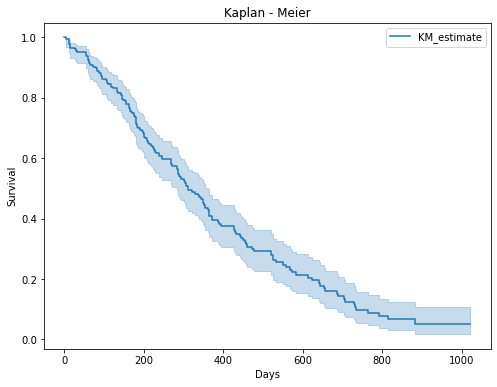

In [142]:
#plotting survival curve
import matplotlib.pyplot as plt
model.plot(figsize=(8,6))
plt.title("Kaplan - Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [143]:
#around 5% of people that had lung cancer managed to survice.

In [144]:
# Log Log Rank Test : Testing if there are statistical differences betweend survival distribution of >=2 groups. 
#Null Hypothesis: There is no difference between both groups.

# Male vs Female

In [145]:
#splitting to 2 groups with males & Females

In [146]:
male=dataset.query("sex==1")
male.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,3.0,306,1,74,1,1.0,90.0,100.0,1175.0,NaN
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
2,3.0,1010,0,56,1,0.0,90.0,90.0,NaN,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
4,1.0,883,1,60,1,0.0,100.0,90.0,NaN,0.0


In [147]:
female=dataset.query("sex==2")
female.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,1,71,2,2.0,60.0,80.0,538.0,1.0
11,16.0,654,1,68,2,2.0,70.0,70.0,NaN,23.0
12,11.0,728,1,68,2,1.0,90.0,90.0,NaN,5.0
18,1.0,61,1,56,2,2.0,60.0,60.0,238.0,10.0


In [148]:

model_males=KaplanMeierFitter()
model_males.fit(durations= male.time, event_observed=male.status)
model_females=KaplanMeierFitter()
model_females.fit(durations= female.time, event_observed=female.status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 90 total observations, 37 right-censored observations>

Text(0, 0.5, 'Survival')

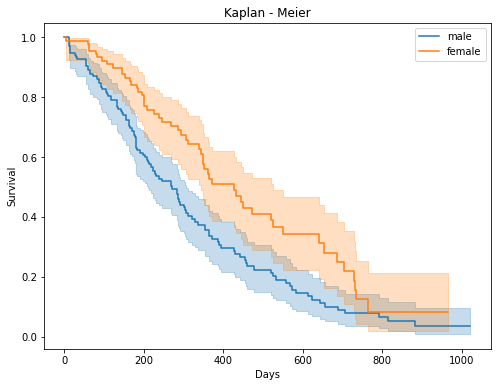

In [149]:
import matplotlib.pyplot as plt
model_males.plot(figsize =(8,6),label="male")
model_females.plot(label="female")
plt.title("Kaplan - Meier")
plt.xlabel("Days")
plt.ylabel("Survival")

In [150]:
#We need a statistical test in order to determine if there is a difference between Male & Females.

In [151]:
#Log Rank test
from lifelines.statistics import logrank_test
logrank_test(durations_A=male.time,
            durations_B=female.time,
            event_observed_A=male.status,
            event_observed_B=female.status)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.33 <0.005      9.57

In [152]:
#P value is very very low, so there is a dirrerence.